# <l style= "text-align: center"><p style= "color: crimson">*Modelo de Predicción de Crecimiento Poblacional*</p></l>
---
<div style="text-align: center">
<img src="img/cuba3.jpeg" alt="img" width="700px" height="700px"/>

Imagen generada por [IA](https://copilot.microsoft.com/images/create?)
</div>

---

##### <p style= "color: cyan">*Importación de dependencias*</p>
---

In [197]:
import numpy as np
from pandas import read_csv, DataFrame
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

##### <p style= "color: cyan">Datos *(Oficina Nacional de Estadísticas e Información (ONEI))*</p>
---


In [198]:
#Lectura del dataset:
data_set = read_csv("data/csv/poblacion-residente.csv")
data_set = DataFrame(data_set)
data_set = data_set.iloc[:,:2]
t_data = list(data_set.index)
P_data = list(data_set["Total"])
n = len(P_data)
data_set.head(10)

,Años,Total
0,1980,9693907
1,1981,9753243
2,1982,9844836
3,1983,9938760
4,1984,10032721
5,1985,10138642
6,1986,10228330
7,1987,10334993
8,1988,10443789
9,1989,10548347


In [199]:
#Convertir a array para trabajar los datos como vectores:
t_data = np.array(t_data)
P_data = np.array(P_data)

# <l style= "text-align: center"><p style= "color: gray">*-Modelo #1-*</p></l>
---
Se desea realizar las estimaciones de los parámetros $(K)$ y $(r)$ en tiempos sin intervalos primeramente.

---

#### <p style= "color: cyan">*Función logística*</p>
---
Se define por la forma: $P(t) = \dfrac{K}{1 + Ae^{-rt}}$
donde se tiene como parámetros:
- K => Capacidad de carga poblacional (Parámetro a estimar)
- r => Tasa de crecimiento intrinseca (Parámetro a estimar)
- A => Constante que depende de las condiciones iniciales de la población: $\left(A=\dfrac{K}{P(0)} -1\right)$
- t => Tiempo en el que se evalua
---

#### <l style= "text-align: center"><p style= "color: orange">*Entrenamiento sin intervalos*</p></l>
---

In [200]:
# Definicion de la función logística sin intervalos con p0 constante:

def gen_log(p0):
    def logistic_function(t, K, r):
        return K / (1 + (K/p0 - 1) * np.exp(-r * t))
    return logistic_function

f = gen_log(P_data[0])


#### <p style="color:cyan"> *Estimación de parámetros*</p>
---
La siguiente celda de código ajustará la función logística a los datos observados, buscando los valores óptimos de $(K)$ y $(r)$ que minimicen la diferencia entre los datos observados y los predichos por el modelo. 

Observaciones:
- La función `curve_fit` del modulo `scipy.optimize` devuelve dos arrays: `popt`, que contiene los *parámetros estimados* , y `pcov`, que contiene la *covarianza de los parámetros estimados*.
- La función `curve_fit` es parte de la biblioteca `SciPy` y se utiliza para ajustar una función a un conjunto de datos mediante el método de *mínimos cuadrados*. Su objetivo principal es encontrar los parámetros de la función que minimizan la diferencia entre los valores observados y los predichos por la función

In [201]:
# Parámetros iniciales:
initial_guess = [10000000, 0.01]  # Asume un valor inicial para K y r

# Ajustar el modelo a los datos observados
popt, pcov = curve_fit(f, t_data, P_data, p0=initial_guess, sigma=None, absolute_sigma=False)

# Imprimir los parámetros estimados
print("Parámetros estimados:", popt)


Parámetros estimados: [1.12801228e+07 1.04126978e-01]


---

# <l style= "text-align: center"><p style= "color: green">*-Resultados del Modelo #1-*</p></l>
---

In [202]:
#Se formatean los datos:
params_formateados = [format(param, ".2f") for param in popt]
print("Parametros formateados: \n", params_formateados)

#Asignacion:
K = float(params_formateados[0])
K = int(K) #Parametro K
r_intr = float(params_formateados[1]) # Tasa intrinseca de crecimiento r
df_sin_intervalos = DataFrame({"K":K, 
                               "r":r_intr}, index=[0])
df_sin_intervalos


Parametros formateados: 
 ['11280122.85', '0.10']


,K,r
0,11280122,0.1


#### <p style= "color: cyan">*Comparación de los datos reales vs evaluaciones de la función logística sin intervalos (1980-2020)*</p>
---

Reales vs Predicción
9693907 Vs 9693907
9753243 Vs 9825388
9844836 Vs 9947469
9938760 Vs 10060577
10032721 Vs 10165161
10138642 Vs 10261683
10228330 Vs 10350614
10334993 Vs 10432421
10443789 Vs 10507566
10548347 Vs 10576498
10662148 Vs 10639655
10756829 Vs 10697455
10829320 Vs 10750299
10895987 Vs 10798566
10912924 Vs 10842615
10947119 Vs 10882782
10983326 Vs 10919385
11033993 Vs 10952717
11076817 Vs 10983053
11113128 Vs 11010648
11146203 Vs 11035736
11168526 Vs 11058535
11200388 Vs 11079247
11215388 Vs 11098054
11217590 Vs 11115126
11218623 Vs 11130620
11202632 Vs 11144676
11188028 Vs 11157425
11173996 Vs 11168986
11174952 Vs 11179468
11167934 Vs 11188969
11175423 Vs 11197580
11173151 Vs 11205382
11210064 Vs 11212452
11238317 Vs 11218857
11239004 Vs 11224658
11239224 Vs 11229913
11221060 Vs 11234671
11209628 Vs 11238981
11193470 Vs 11242883
11181595 Vs 11246416


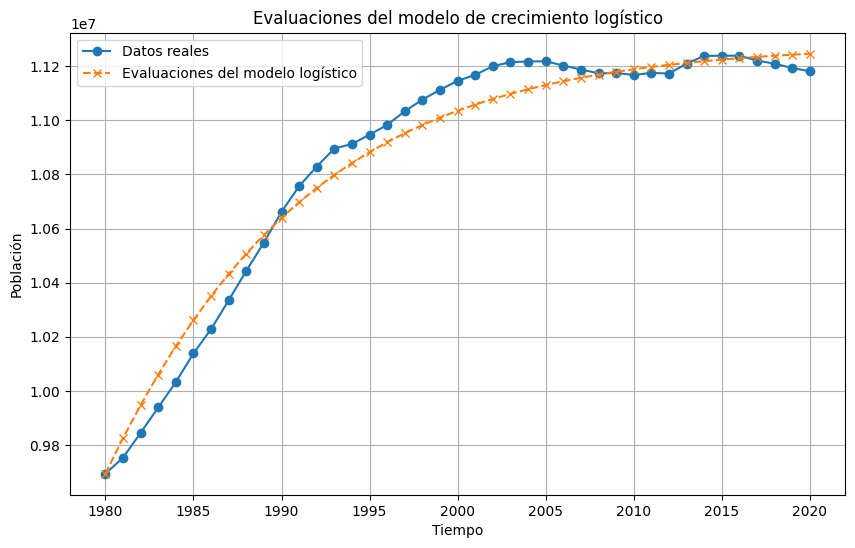

In [203]:
def logistic_function(t, K, r):
    return K / (1 + (K/P_data[0] - 1) * np.exp(-r * t))
# Valores predichos por la función logística
predicted_population = logistic_function(t_data[:-2], K, r_intr)
predicted_population = [int(x) for x in predicted_population]
print("Reales vs Predicción\n=====================")
for i,j in zip(list(P_data[:-2]), list(predicted_population)):
    print(i, "Vs", j)

years = np.arange(1980,2021) #Vector de años

# Plot de los datos reales vs los predichos
plt.figure(figsize=(10, 6))
plt.plot(years, P_data[:-2], label='Datos reales', marker='o', linestyle='-')
plt.plot(years, predicted_population, label='Evaluaciones del modelo logístico', marker='x', linestyle='--')

plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Evaluaciones del modelo de crecimiento logístico')
plt.legend()
plt.grid(True)
plt.show()

#### <p style= "color: cyan">*Exactitud del modelo*</p>
---

Primero, dado que se está trabajando con un modelo de regresión logística, una alternativa adecuada sería el error absoluto medio *(MAE - Mean Absolute Error)* o el error relativo medio (RMSE - Root Mean Square Error), entre las predicciones y los datos reales (ambos expresados en porcentaje).
- El MAE mide la diferencia absoluta promedio entre los valores observados y los predichos. 
- Para convertirlo en un porcentaje, se divide el MAE por el valor promedio real y se multiplica por 100.

In [204]:
mae = np.mean(np.abs(np.array(P_data[:-2]) - np.array(predicted_population)))
maep = (mae / np.mean(P_data[:-2])) * 100
print(f"Error Absoluto Medio (MAE) en Porcentaje: {maep:.2f}%")


Error Absoluto Medio (MAE) en Porcentaje: 0.59%


*Otra alternativa:*

- El RMSE es la raíz cuadrada del error cuadrático medio (MSE). Similar al MAE.

In [205]:
mse = np.mean((np.array(P_data[:-2]) - np.array(predicted_population))**2) #MSE
rmse = np.sqrt(mse)
rmsep = (rmse / np.mean(P_data[:-2])) * 100
print(f"Error Relativo Medio (RMSE) en Porcentaje: {rmsep:.2f}%")

Error Relativo Medio (RMSE) en Porcentaje: 0.70%


*Interpretacion:*

- Valor Bajo: Es considerado bastante bajo, lo que sugiere que el modelo hace predicciones bastante precisas en relación con los valores observados. 

Consideraciones Adicionales: 
- Es importante recordar que el RMSE es sensible a valores atípicos y depende de la escala de los datos. Además, aunque un RMSE bajo es deseable, también es crucial considerar otros aspectos del modelo, como la capacidad de generalización y la simplicidad del modelo, para asegurar que el modelo sea tanto preciso como práctico para su aplicación específica.

En conclusión, los valores del MAE y el RMSE obtenidos indican un buen ajuste al modelo, sugiriendo que las predicciones están cerca de los valores observados. Sin embargo, siempre es recomendable contextualizar este valor dentro del marco de tu proyecto específico y considerar múltiples métricas y aspectos del modelo para tomar decisiones informadas.

# <l style= "text-align: center"><p style= "color: gray">*-Modelo #2-*</p></l>
---
Se desea realizar las estimaciones de los `parámetros` en 3 rangos de intervalos para `5`, `8` y `10` tiempos de diferencia.

---

#### <l style= "text-align: center"><p style= "color: orange">*Entrenamiento con intervalos*</p></l>
---

In [206]:
initial_guess = [10000000, 0.01]
def model(t, P, times):
    results = {}
    def estimate(times):
        x = 0
        y = times
        estimate_k = []
        estimate_r=[]
        estimate_lenght = int((n-3)/times)
        for _ in range(estimate_lenght):
            par_t = t[x:y]
            par_P = P[x:y]
            f = gen_log(par_P[0]) 
            # Ajustar el modelo a los datos observados
            popt, pcov = curve_fit(f, par_t, par_P, p0=initial_guess, sigma=None, absolute_sigma=False)
            params_formateados = [format(param, ".2f") for param in popt]
            popt_formateado = list(map(lambda x: float(x), popt))
            estimate_k.append(popt_formateado[0])
            estimate_r.append(popt_formateado[1])
            x += times
            y += times
        return [int(x) for x in estimate_k], [np.round(x,3) for x in estimate_r], pcov
    for i in times:
        K, r, cov = estimate(i)
        results[str(i) + " años"] = {"K": K, "r" : r, "Covarianza" : cov}
    return results

In [207]:
#Llamada a la función del modelo por intervalos
results = model(t_data[:-3], P_data[:-3], [5,8,10])

# <l style= "text-align: center"><p style= "color: green">*-Resultados del Modelo #1-*</p></l>
---

In [208]:
df = DataFrame(results)
df_5 = DataFrame({"K" : results["5 años"]["K"], "r" : results["5 años"]["r"]})
df_8 = DataFrame({"K" : results["8 años"]["K"], "r" : results["8 años"]["r"]})
df_10 = DataFrame({"K" : results["10 años"]["K"], "r" : results["10 años"]["r"]})

In [209]:
df_5

,K,r
0,204423337054,0.008
1,340143106946,0.003
2,10660179,-0.352
3,51052382079,0.000
4,2575174752,0.000
5,1223441,0.000
6,999003076,0.000
7,1798999,0.000


In [210]:
df_8

,K,r
0,2055969070415,0.009
1,10396071,-0.167
2,10981262,-0.209
3,1000853,0.000
4,11251162,0.022


In [211]:
df_10

,K,r
0,2059434657188,0.009
1,10623571,-0.135
2,726227,-0.000
3,5837330070,0.000


---

Se pueden identificar varios problemas en las respuestas de los parámetros estimados dentro de ciertos intervalos para cada rango. Esta situación se debe a que los valores en esos periodos presentan una tendencia casi vertical, caracterizada por una inclinación pronunciada hacia arriba. Como resultado, el valor de K podría verse afectado, ya que teóricamente, cuando el tiempo tiende a infinito, la función poblacional tiende a K. En consecuencia, en la primera aproximación global, K proporciona un valor cercano a la población total de Cuba (11 millones).

Es importante tener en cuenta que los datos reales no siguen exactamente la curva logística ideal. La función real presenta segmentos más concavos y otros más convexos que la función teórica. Por esta razón, se realizará un ajuste diferente al utilizado con todos los datos, basándose en un crecimiento más acelerado. Este ajuste se justifica porque los puntos en cuestión muestran una tendencia más vertical, lo que implica aumentos significativos en la población. Dado que estos aumentos son tan pronunciados, es razonable esperar que K también experimente una subida considerable.

---

# <l style= "text-align: center"><p style= "color: crimson">*Evaluación*</p></l>
---
Se realiza una primera evaluación de prueba utilizando solo la función logística sin ningun intervalo de evaluación, antes de proceder a la predicción 

---

Años	Predicción
2020 	 11246416
2021 	 11249615
2022 	 11252511
2023 	 11255133
2024 	 11257506
2025 	 11259654
2026 	 11261599
2027 	 11263359
2028 	 11264952
2029 	 11266394
2030 	 11267699


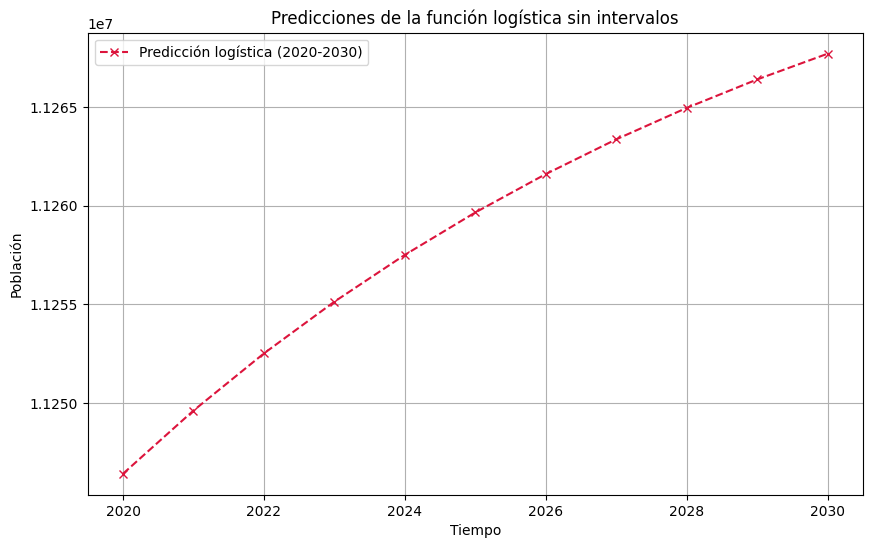

In [212]:
#Tiempos para evaluar
extended_t_data = np.arange(40,51)
predicted_population2030 = logistic_function(extended_t_data, K, r_intr)
predicted_population2030 = [int(x) for x in predicted_population2030]
years_prediction = np.arange(2020,2031) #Vector de años
print("Años\tPredicción\n==================")
for i, j in zip(years_prediction,list(predicted_population2030)):
    print(i,"\t",j)

plt.figure(figsize=(10, 6))
plt.plot(years_prediction, predicted_population2030, label='Predicción logística (2020-2030)', marker='x', linestyle='--', color="crimson")
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Predicciones de la función logística sin intervalos')
plt.legend()

plt.grid(True)
plt.show()


---

Luego se evalua con la función logística por intervalos para predecir los valores de la población para futuos años utilizando las estimaciones de los parámetros de $(K)$ y $(r)$ en el último intervalo de cada rango del modelo.

---

Años	Predicción
2020 	 1826240
2021 	 1823612
2022 	 1821241
2023 	 1819100
2024 	 1817168
2025 	 1815423
2026 	 1813847
2027 	 1812424
2028 	 1811138
2029 	 1809975
2030 	 1808925


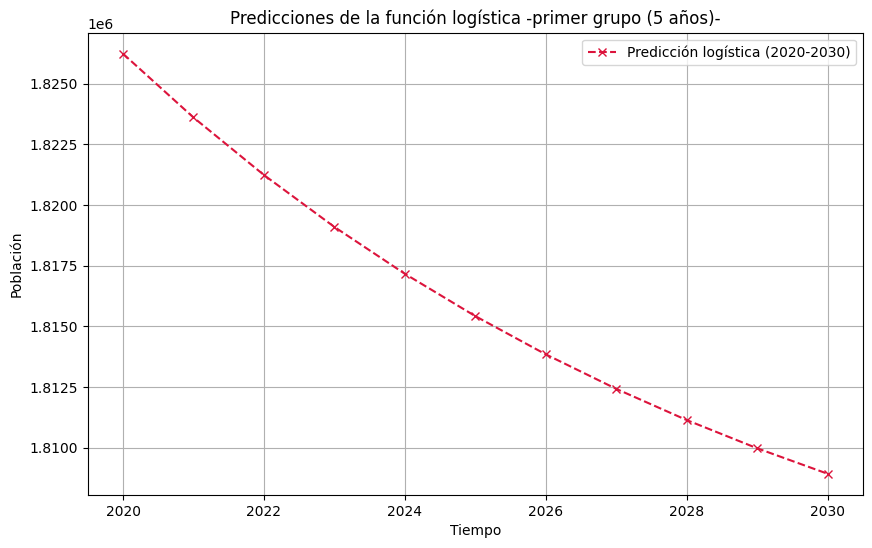

In [213]:
#Rango de intervalos de 5 tiempos
vals = list(df_5.iloc[-1])
K, r = vals[0], vals[1]
extended_t_data = np.arange(40,51)
predicted_population2030 = logistic_function(extended_t_data, K, r_intr)
predicted_population2030 = [int(x) for x in predicted_population2030]
years_prediction = np.arange(2020,2031) #Vector de años
print("Años\tPredicción\n==================")
for i, j in zip(years_prediction,list(predicted_population2030)):
    print(i,"\t",j)

plt.figure(figsize=(10, 6))
plt.plot(years_prediction, predicted_population2030, label='Predicción logística (2020-2030)', marker='x', linestyle='--', color="crimson")

plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Predicciones de la función logística -primer grupo (5 años)-')
plt.legend()

plt.grid(True)
plt.show()

En este caso claramente para este intervalo fue donde el modelo tuvo peor ajuste, devolviendo unos valores infimamente menores a la existencia promedio y con una tasa nula.

---

Años	Predicción
2020 	 11218155
2021 	 11221287
2022 	 11224123
2023 	 11226691
2024 	 11229015
2025 	 11231119
2026 	 11233023
2027 	 11234747
2028 	 11236307
2029 	 11237719
2030 	 11238996


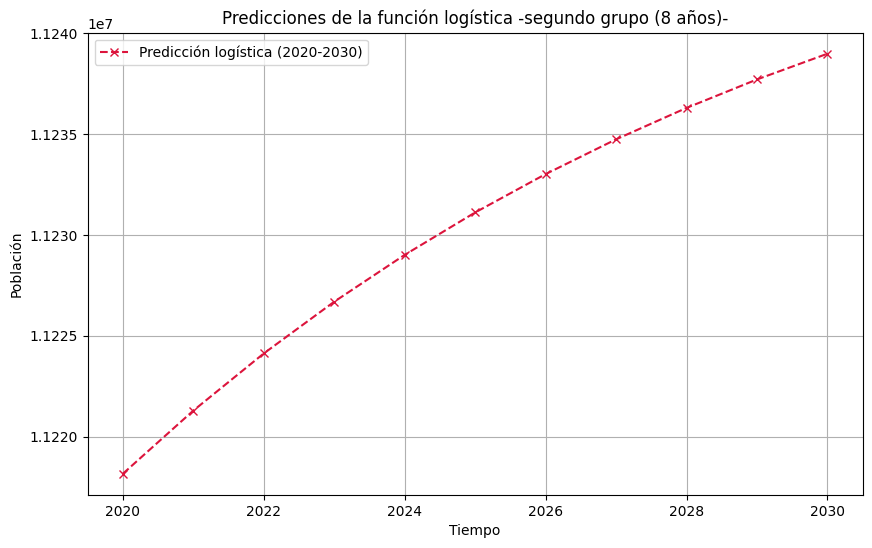

In [214]:
#Rango de intervalos de 8 tiempos
vals = list(df_8.iloc[-1])
K, r = vals[0], vals[1]
extended_t_data = np.arange(40,51)
predicted_population2030 = logistic_function(extended_t_data, K, r_intr)
predicted_population2030 = [int(x) for x in predicted_population2030]
years_prediction = np.arange(2020,2031) #Vector de años
print("Años\tPredicción\n==================")
for i, j in zip(years_prediction,list(predicted_population2030)):
    print(i,"\t",j)

plt.figure(figsize=(10, 6))
plt.plot(years_prediction, predicted_population2030, label='Predicción logística (2020-2030)', marker='x', linestyle='--', color="crimson")
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Predicciones de la función logística -segundo grupo (8 años)-')
plt.legend()

plt.grid(True)
plt.show()

Por otro lado para este grupo se tuvieron los mejores resultados devolviendo en mas de la mitad de los intervalos valores de $K$ y $r$ cercanos a la densidad poblacional promedio.

Años	Predicción
2020 	 486010070
2021 	 532461736
2022 	 582869560
2023 	 637476010
2024 	 696520151
2025 	 760233513
2026 	 828835334
2027 	 902527188
2028 	 981487044
2029 	 1065862849
2030 	 1155765756


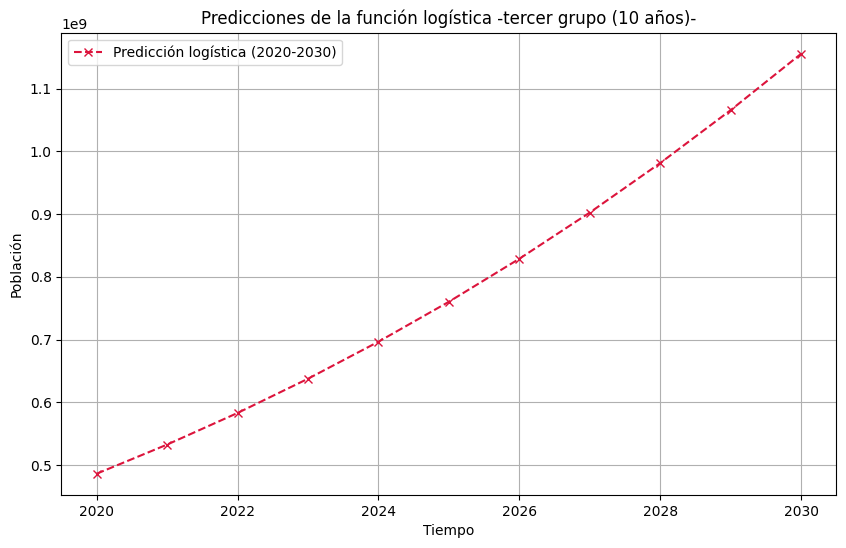

In [215]:
#Rango de intervalos de 10 tiempos
vals = list(df_10.iloc[-1])
K, r = vals[0], vals[1]
extended_t_data = np.arange(40,51)
predicted_population2030 = logistic_function(extended_t_data, K, r_intr)
predicted_population2030 = [int(x) for x in predicted_population2030]
years_prediction = np.arange(2020,2031) #Vector de años
print("Años\tPredicción\n==================")
for i, j in zip(years_prediction,list(predicted_population2030)):
    print(i,"\t",j)

plt.figure(figsize=(10, 6))
plt.plot(years_prediction, predicted_population2030, label='Predicción logística (2020-2030)', marker='x', linestyle='--', color="crimson")
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Predicciones de la función logística -tercer grupo (10 años)-')
plt.legend()

plt.grid(True)
plt.show()

Y, como última evaluación se tienen estos resultados, que, al igual que en el primer grupo, no se obtuvo un buen ajuste de los parámetros, en este caso para valores mosntruosamente mayores que la población media.